# OpenCV fundamentals

This notebook covers opening files, looking at pixels, and some simple image processing techniques.

We'll use the following sample image, stolen from the Internet. But you can use whatever image you like.

![No idea](https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg "I have no idea")

<p>
 Estimated time needed: <strong>20 min</strong>
</p>



## Python getting started

First we need to import the relevant libraries: OpenCV itself, Numpy, and a couple of others. Common and Video are simple data handling and opening routines that you can find in the OpenCV Python Samples directory or from the github repo linked above.  We'll start each notebook with the same includes - you don't need all of them every time (so this is bad form, really) but it's easier to just copy and paste. 

In [1]:

# These imports let you use opencv
import cv2 #opencv itself
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks


Now we can open an image:

In [2]:
input_image=cv2.imread('noidea.jpg')

We can find out various things about that image

In [3]:
print(input_image.shape)

(414, 625, 3)


In [4]:
print(input_image.size) 

776250


In [5]:
414*625*3

776250

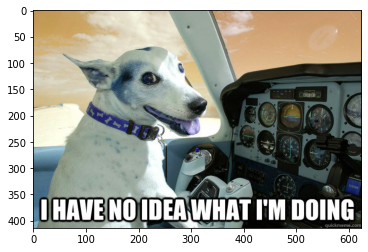

In [6]:
plt.imshow( input_image)


What this illustrates is something key about OpenCV: it doesn't store images in RGB format, but in BGR format.

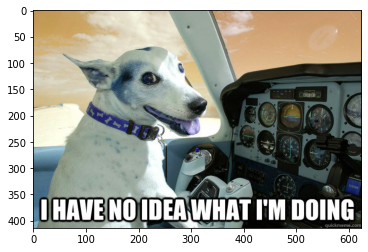

In [7]:
plt.imshow(input_image)


If you dont want to get into this confusion of color schemes, you can just use the `cv2.imshow` function to load an image.

In [8]:
cv2.imshow("Image", input_image)
cv2.waitKey(0)

-1

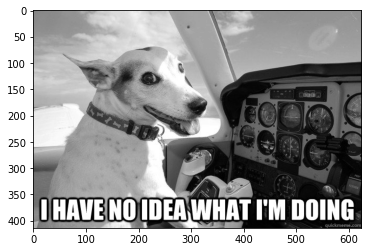

In [9]:
grey = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
plt.imshow(grey, cmap='gray')

## converting between colour spaces, merging and splitting channels

We can convert between various colourspaces in OpenCV easily. We've seen how to split, above. We can also merge channels:

OpenCV also has a function specifically for dealing with image colorspaces, so rather than split and merge channels by hand you can use this instead. It is usually marginally faster...

There are something like 250 color related flags in OpenCV for conversion and display. The ones you are most likely to use are COLOR_BGR2RGB for RGB conversion, COLOR_BGR2GRAY for conversion to greyscale, and COLOR_BGR2HSV for conversion to Hue,Saturation,Value colour space. [http://docs.opencv.org/trunk/de/d25/imgproc_color_conversions.html] has more information on how these colour conversions are done. 

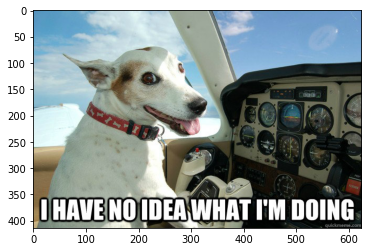

In [10]:
opencv_merged=cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(opencv_merged)


## Getting image data and setting image data

Images in python OpenCV are numpy arrays. Numpy arrays are optimised for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

[150 161 153]


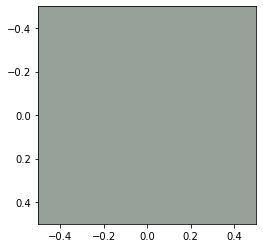

In [11]:
pixel = input_image[100,100]
print(pixel)
plt.imshow([[pixel]])


So it returned a pixel which has [0,0,0] color code?
Remember what color is it?

## Getting and setting regions of an image

In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to get a region of interest to work on. 

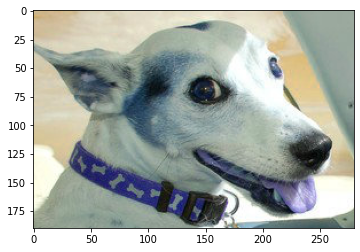

In [12]:
dogface = input_image[60:250, 70:350]
plt.imshow(dogface)

## Matrix slicing
In OpenCV python style, as I have mentioned, images are numpy arrays. There are some superb array manipulation in numpy tutorials out there: this is a great introduction if you've not done it before [http://www.scipy-lectures.org/intro/numpy/numpy.html#indexing-and-slicing]. The getting and setting of regions above uses slicing, though, and I'd like to finish this notebook with a little more detail on what is going on there. 

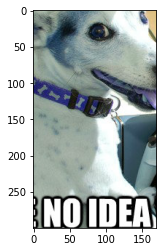

In [13]:
freshim2 = cv2.imread("noidea.jpg")
crop = freshim2[100:400, 130:300] 
plt.imshow(crop)

The key thing to note here is that the slicing works like
```
[top_y:bottom_y, left_x:right_x]
```
This can also be thought of as 
```
[y:y+height, x:x+width]
```

You can also use slicing to separate out channels.  In this case you want 
```
[y:y+height, x:x+width, channel]
```
where channel represents the colour you're interested in - this could be 0 = blue, 1 = green or 2=red if you're dealing with a default OpenCV image, but if you've got an image that has been converted it could be something else. Here's an example that converts to HSV then selects the S (Saturation) channel of the same crop above:

HSV (Hue, Saturation, Value) 

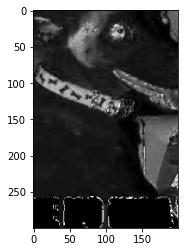

In [14]:
hsvim=cv2.cvtColor(freshim2,cv2.COLOR_BGR2HSV)

bcrop =hsvim[100:400, 100:300, 1]
plt.imshow(bcrop, cmap="gray")

# Video capture

Reading a Video stream (may it be live or from a file) is a lot similar to reading an image.
As expalined earlier. 
A video is a set of images and in-order to load a set of images continuosly you need to put on  a while loop and read the next frame.



In [16]:
camera = cv2.VideoCapture("C:\Users\pwayk\Downloads\pexels-mart-production-7565438.mp4")
while True:
    ret, frame = camera.read()
    cv2.imshow("Camera", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()
camera.release()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_13448/991535575.py, line 1)

# Taking a Realtime Video

In [ ]:
camera = cv2.VideoCapture(0)
while True:
    ret, frame = camera.read()
    cv2.imshow("Camera", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()
camera.release()


[Next](2-Image_stats_and_image_processing.ipynb)